In [1]:
from cmath import sin, pi
from math import inf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

# Объявление функций

### Метод Симпсона

In [2]:
def simp(a, b, h, f):
    F = 0
    xt = a + h
    while xt <= b:
        F = F + h/3 * (f(xt) + 4*f(xt - h) + f(xt - 2*h))
        xt = xt + 2*h
    return F

### Метод трапеций

In [3]:
def trap(a, b, h, f):
    F = 0
    xi = a + h
    while xi <= b:
        F = F + 1 / 2 * h * (    f(xi) + f(xi - h)    )
        xi = xi + h
    return F

Объявим интегрируемую функцию, критерий останова  и границы интервала:

In [4]:
f = lambda x: 3 / (2 + np.sin(x))
is_stop = lambda cur, prev: np.abs(cur - prev) < 0.001 * np.abs(cur)
etalon = lambda x: 2 * np.sqrt(3) * np.arctan((1 + 2*np.tan(x/2))/np.sqrt(3))
a = -pi/4
b = pi/4

Объявление функции, выполняющей итеративный процесс:

In [5]:
def calc(method):
    n = [1]
    current_value = -inf
    prev_value = -inf
    values = []

    while not is_stop(current_value, prev_value):
        prev_value = current_value
        current_value = method(a, b, (b - a) / n[-1], f)
        values.append(current_value)
        n.append(n[-1] * 2)
    return n[:-1], values

# Вычислим решение

In [6]:
n_simp, values_simp = calc(simp)
n_trap, values_trap = calc(trap)

### Результаты метода Симпсона

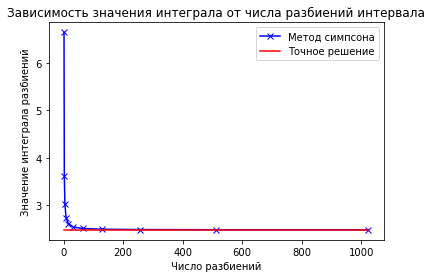

In [7]:
plt.plot(n_simp, values_simp, 'bx-');
plt.plot([1, n_simp[-1]], [etalon(b) - etalon(a)] * 2, 'r-');
plt.title('Зависимость значения интеграла от числа разбиений интервала')
plt.xlabel('Число разбиений')
plt.ylabel('Значение интеграла разбиений')
plt.legend([u'Метод симпсона', u'Точное решение']);

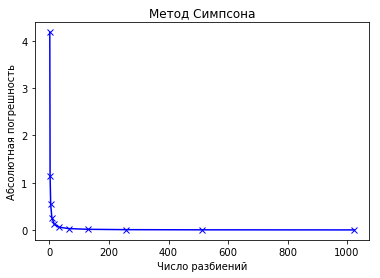

In [8]:
plt.plot(n_simp, values_simp - (etalon(b) - etalon(a)), 'bx-');
plt.title('Метод Симпсона')
plt.xlabel('Число разбиений')
plt.ylabel('Абсолютная погрешность');

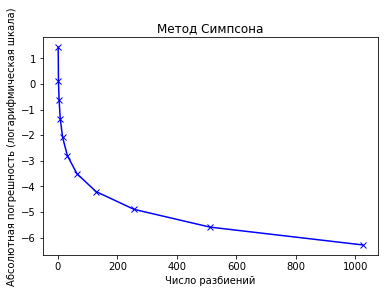

In [9]:
plt.plot(n_simp, np.log(values_simp - (etalon(b) - etalon(a))), 'bx-');
plt.title('Метод Симпсона')
plt.xlabel('Число разбиений')
plt.ylabel('Абсолютная погрешность (логарифмическая шкала)');

### Результаты метода трапеций

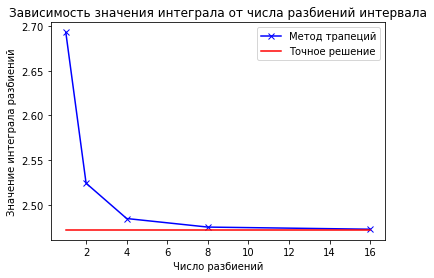

In [10]:
plt.plot(n_trap, values_trap, 'bx-');
plt.plot([1, n_trap[-1]], [etalon(b) - etalon(a)] * 2, 'r-');
plt.title('Зависимость значения интеграла от числа разбиений интервала')
plt.xlabel('Число разбиений')
plt.ylabel('Значение интеграла разбиений')
plt.legend([u'Метод трапеций', u'Точное решение']);

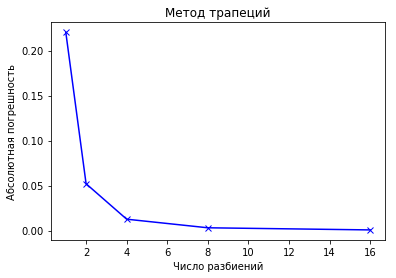

In [11]:
plt.plot(n_trap, values_trap - (etalon(b) - etalon(a)), 'bx-');
plt.title('Метод трапеций')
plt.xlabel('Число разбиений')
plt.ylabel('Абсолютная погрешность');

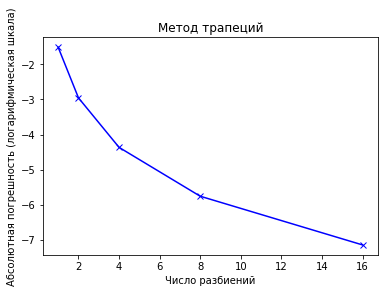

In [12]:
plt.plot(n_trap, np.log(values_trap - (etalon(b) - etalon(a))), 'bx-');
plt.title('Метод трапеций')
plt.xlabel('Число разбиений')
plt.ylabel('Абсолютная погрешность (логарифмическая шкала)');

### Таблица с результатами вычислений

In [13]:
df = pd.DataFrame({'N': n_simp if len(n_simp) > len(n_trap) else n_trap,
              'Значение интеграла (метод Симпсона)': values_simp})
df = pd.concat([df, pd.DataFrame(values_trap)], axis=1)
cols = list(df.columns)
cols[-1] = 'Значение интеграла (метод Трапеций)'
df.columns = cols
df

,N,Значение интеграла (метод Симпсона),Значение интеграла (метод Трапеций)
0,1,6.654983,2.692794
1,2,3.607991,2.524494
2,4,3.015698,2.485116
3,8,2.728624,2.475568
4,16,2.596073,2.473201
5,32,2.533090,NaN
6,64,2.502459,NaN
7,128,2.487363,NaN
8,256,2.479870,NaN
9,512,2.476137,NaN
